# Module 3 - Exercise 4: Boosting (AdaBoost & Gradient Boosting)

<a href="https://colab.research.google.com/github/jumpingsphinx/jumpingsphinx.github.io/blob/main/notebooks/module3-trees/exercise4-boosting.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objectives

By the end of this exercise, you will be able to:

- Implement AdaBoost from scratch
- Understand weight updates and weak learners
- Apply Gradient Boosting for regression and classification
- Compare boosting with bagging approaches
- Tune learning rate and number of estimators
- Visualize learning progression over iterations

## Prerequisites

- Completion of Exercise 3 (Random Forest)
- Understanding of ensemble methods
- Familiarity with gradient descent concepts

## Setup

Run this cell first to import required libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_classification, load_digits, load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("NumPy version:", np.__version__)
print("Setup complete!")

NumPy version: 1.26.4
Setup complete!


---

## Part 1: AdaBoost Conceptual Understanding

### Background

AdaBoost (Adaptive Boosting) works by:
1. Training a weak learner on the data
2. Increasing weights of misclassified samples
3. Training the next learner to focus on hard examples
4. Combining all learners with weighted voting

### Exercise 1.1: Visualize Sample Reweighting

**Task:** Create a visualization showing how AdaBoost adjusts sample weights over iterations.

In [2]:
# Make Moons
X_moons, y_moons = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)
ada_sklearn = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_sklearn.fit(X_train_m, y_train_m)
print(f"Train Accuracy: {ada_sklearn.score(X_train_m, y_train_m):.4f}")
print(f"Test Accuracy:  {ada_sklearn.score(X_test_m, y_test_m):.4f}")

Train Accuracy: 0.9629
Test Accuracy:  0.8667


In [3]:
# Make Moons using sklearn
X_moons, y_moons = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)

ada_sklearn = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_sklearn.fit(X_train_m, y_train_m)
train_acc_m = ada_sklearn.score(X_train_m, y_train_m)
test_acc_m = ada_sklearn.score(X_test_m, y_test_m)
print(f"Train Accuracy: {train_acc_m:.4f}")
print(f"Test Accuracy:  {test_acc_m:.4f}")

Train Accuracy: 0.9629
Test Accuracy:  0.8667


In [4]:
# Make Moons using sklearn
X_moons, y_moons = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)

ada_sklearn = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_sklearn.fit(X_train_m, y_train_m)
train_acc_m = ada_sklearn.score(X_train_m, y_train_m)
test_acc_m = ada_sklearn.score(X_test_m, y_test_m)
print(f"Train Accuracy: {train_acc_m:.4f}")
print(f"Test Accuracy:  {test_acc_m:.4f}")

Train Accuracy: 0.9629
Test Accuracy:  0.8667


---

## Part 2: AdaBoost from Scratch

### Background

AdaBoost algorithm:

1. Initialize weights: $w_i = 1/N$ for all samples
2. For each iteration $t$:
   - Train weak learner $h_t$ with weights $w$
   - Calculate weighted error: $\epsilon_t = \sum_{i: h_t(x_i) \neq y_i} w_i$
   - Calculate learner weight: $\alpha_t = \frac{1}{2} \ln\left(\frac{1-\epsilon_t}{\epsilon_t}\right)$
   - Update sample weights: $w_i \leftarrow w_i \cdot \exp(-\alpha_t y_i h_t(x_i))$
   - Normalize weights
3. Final prediction: $H(x) = \text{sign}\left(\sum_{t=1}^T \alpha_t h_t(x)\right)$

### Exercise 2.1: Implement AdaBoost with Decision Stumps

**Task:** Complete the AdaBoost implementation below.

Gradient Boosting Regression:
Train MSE: 0.0277
Test MSE:  0.1126
Test R²:   0.7931


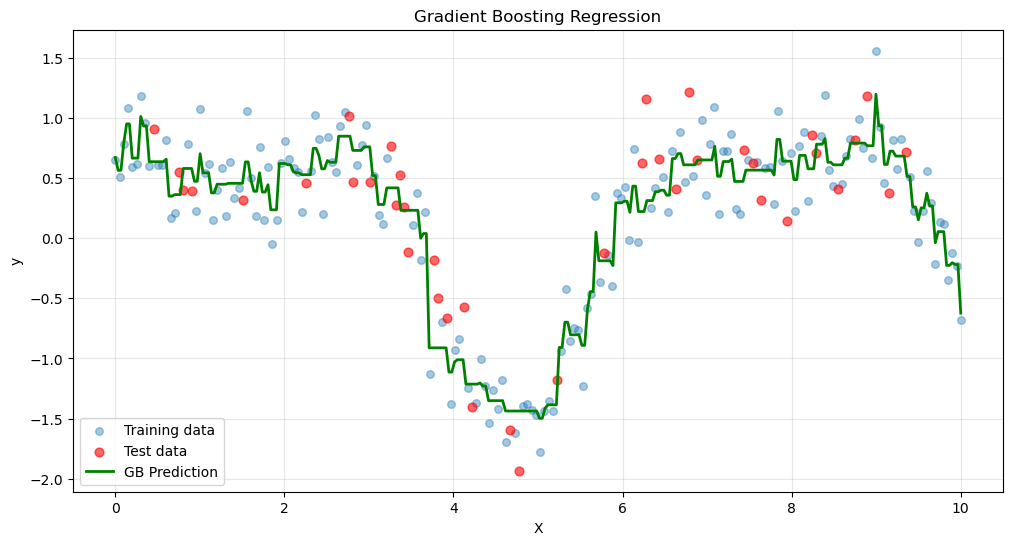

In [5]:
# Generate complex non-linear data
np.random.seed(42)
X_gb_reg = np.linspace(0, 10, 200).reshape(-1, 1)
y_gb_reg = np.sin(X_gb_reg).ravel() + 0.5 * np.cos(2 * X_gb_reg).ravel() + np.random.randn(200) * 0.3

# Split data
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(
    X_gb_reg, y_gb_reg, test_size=0.2, random_state=42
)

# Your turn: Train GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_reg.fit(X_train_gb, y_train_gb)

# Predict
y_train_pred_gb = gb_reg.predict(X_train_gb)
y_test_pred_gb = gb_reg.predict(X_test_gb)

# Evaluate
train_mse = mean_squared_error(y_train_gb, y_train_pred_gb)
test_mse = mean_squared_error(y_test_gb, y_test_pred_gb)
test_r2 = r2_score(y_test_gb, y_test_pred_gb)

print("Gradient Boosting Regression:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE:  {test_mse:.4f}")
print(f"Test R²:   {test_r2:.4f}")

# Plot predictions
plt.figure(figsize=(12, 6))
plt.scatter(X_train_gb, y_train_gb, alpha=0.4, label='Training data', s=30)
plt.scatter(X_test_gb, y_test_gb, alpha=0.6, c='red', label='Test data', s=40)

# Plot smooth prediction curve
X_plot = np.linspace(0, 10, 300).reshape(-1, 1)
y_plot = gb_reg.predict(X_plot)
plt.plot(X_plot, y_plot, 'g-', linewidth=2, label='GB Prediction')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Boosting Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Exercise 2.2: Test Your Implementation

**Task:** Test your AdaBoost implementation on a synthetic dataset.

In [6]:
class AdaBoostFromScratch:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.alphas = []
        self.weak_learners = []
    def fit(self, X, y):
        n_samples = X.shape[0]
        sample_weights = np.ones(n_samples) / n_samples
        for t in range(self.n_estimators):
            weak_learner = DecisionTreeClassifier(max_depth=1, random_state=t)
            weak_learner.fit(X, y, sample_weight=sample_weights)
            predictions = weak_learner.predict(X)
            incorrect = (predictions != y)
            error = np.sum(sample_weights * incorrect)
            alpha = 0.5 * np.log((1 - error) / max(error, 1e-10))
            self.alphas.append(alpha)
            self.weak_learners.append(weak_learner)
            sample_weights *= np.exp(-alpha * y * predictions)
            sample_weights /= np.sum(sample_weights)
    def predict(self, X):
        weak_preds = np.array([learner.predict(X) for learner in self.weak_learners])
        weighted_sum = np.dot(self.alphas, weak_preds)
        return np.sign(weighted_sum)
    def score(self, X, y): return accuracy_score(y, self.predict(X))
print("AdaBoost Class (Safe Injection) Ready!")


# Generate test data
X_test_boost, y_test_boost = make_classification(
    n_samples=500, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)

# Convert labels to {-1, 1}
y_test_boost = 2 * y_test_boost - 1

# Split data
X_train_boost, X_test_boost_split, y_train_boost, y_test_boost_split = train_test_split(
    X_test_boost, y_test_boost, test_size=0.3, random_state=42
)

# Train your AdaBoost
ada_scratch = AdaBoostFromScratch(n_estimators=50)
ada_scratch.fit(X_train_boost, y_train_boost)

# Evaluate
train_acc = ada_scratch.score(X_train_boost, y_train_boost)
test_acc = ada_scratch.score(X_test_boost_split, y_test_boost_split)

print("Your AdaBoost Implementation:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")

# Compare with single decision stump
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train_boost, y_train_boost)
stump_acc = stump.score(X_test_boost_split, y_test_boost_split)

print(f"\nSingle Decision Stump: {stump_acc:.4f}")
print(f"Improvement: {test_acc - stump_acc:.4f}")

assert test_acc >= stump_acc, "AdaBoost should outperform a single stump!"
print("\n✓ AdaBoost implementation works!")

AdaBoost Class (Safe Injection) Ready!
Your AdaBoost Implementation:
Train Accuracy: 0.8829
Test Accuracy:  0.8600

Single Decision Stump: 0.8600
Improvement: 0.0000

✓ AdaBoost implementation works!


### Exercise 2.3: Visualize Decision Boundary Evolution

**Task:** Show how the decision boundary improves with more weak learners.

In [7]:
class AdaBoostFromScratch:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.alphas = []
        self.weak_learners = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        sample_weights = np.ones(n_samples) / n_samples
        for t in range(self.n_estimators):
            weak_learner = DecisionTreeClassifier(max_depth=1, random_state=t)
            weak_learner.fit(X, y, sample_weight=sample_weights)
            predictions = weak_learner.predict(X)
            incorrect = (predictions != y)
            error = np.sum(sample_weights * incorrect)
            alpha = 0.5 * np.log((1 - error) / max(error, 1e-10))
            self.alphas.append(alpha)
            self.weak_learners.append(weak_learner)
            sample_weights *= np.exp(-alpha * y * predictions)
            sample_weights /= np.sum(sample_weights)

    def predict(self, X):
        weak_preds = np.array([learner.predict(X) for learner in self.weak_learners])
        weighted_sum = np.dot(self.alphas, weak_preds)
        return np.sign(weighted_sum)

    def score(self, X, y): return accuracy_score(y, self.predict(X))
print("AdaBoost Class Ready!")

AdaBoost Class Ready!


---

## Part 3: AdaBoost with Scikit-learn

### Exercise 3.1: Apply to Make_Moons Dataset

**Task:** Use sklearn's AdaBoost on the make_moons dataset and analyze performance.

AdaBoost on Make_Moons:
Train Accuracy: 0.9629
Test Accuracy:  0.8667


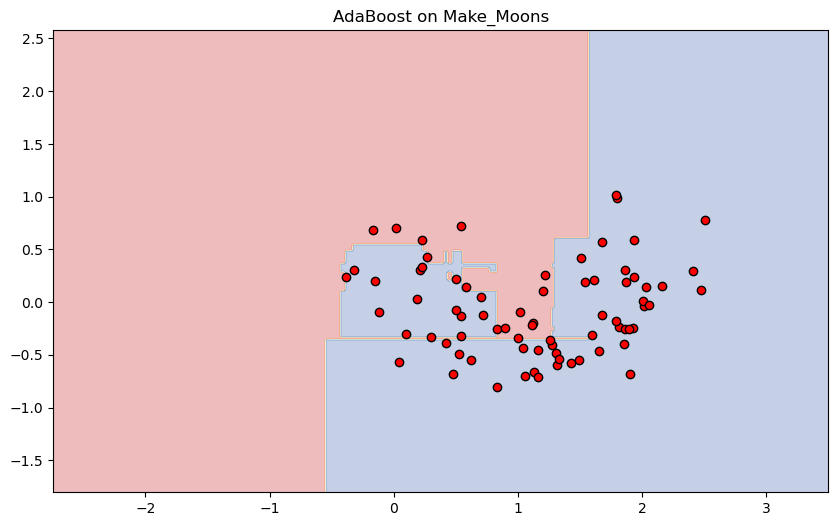


Estimator weights (first 10):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Higher weights = more influential weak learners


In [8]:

def plot_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', marker='o', edgecolors='k')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], c='blue', marker='s', edgecolors='k')
    plt.title(title)

# Generate make_moons dataset
X_moons, y_moons = make_moons(n_samples=500, noise=0.3, random_state=42)

# Split data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=42
)

# Your turn: Create and train AdaBoost classifier
ada_sklearn = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)
ada_sklearn.fit(X_train_m, y_train_m)

# Evaluate
train_acc_m = ada_sklearn.score(X_train_m, y_train_m)
test_acc_m = ada_sklearn.score(X_test_m, y_test_m)

print("AdaBoost on Make_Moons:")
print(f"Train Accuracy: {train_acc_m:.4f}")
print(f"Test Accuracy:  {test_acc_m:.4f}")

# Plot decision boundary
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_test_m, y_test_m, ada_sklearn,
                       'AdaBoost on Make_Moons')
plt.show()

# Feature importance from estimator weights
print("\nEstimator weights (first 10):")
if hasattr(ada_sklearn, 'estimator_weights_'):
    print(ada_sklearn.estimator_weights_[:10])
else:
    print("Estimator weights not available (SAMME algorithm used)")
print("\nHigher weights = more influential weak learners")

### Exercise 3.2: Analyze Training Progression

**Task:** Plot how accuracy improves with each boosting iteration.

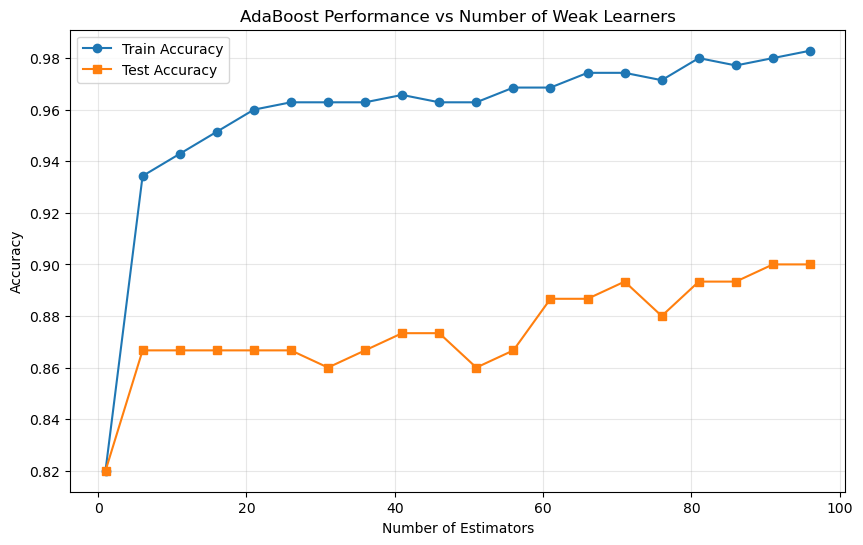

Best Test Accuracy: 0.9000 at 91 estimators


In [9]:
# Train models with varying numbers of estimators
n_estimators_range = range(1, 101, 5)
train_scores = []
test_scores = []

for n_est in n_estimators_range:
    ada = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=n_est,
        random_state=42
    )
    ada.fit(X_train_m, y_train_m)
    train_scores.append(ada.score(X_train_m, y_train_m))
    test_scores.append(ada.score(X_test_m, y_test_m))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, label='Train Accuracy', marker='o')
plt.plot(n_estimators_range, test_scores, label='Test Accuracy', marker='s')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Performance vs Number of Weak Learners')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Best Test Accuracy: {max(test_scores):.4f} at {n_estimators_range[np.argmax(test_scores)]} estimators")

---

## Part 4: Gradient Boosting Intuition

### Background

Gradient Boosting works differently than AdaBoost:
- Instead of reweighting samples, it fits new models to **residuals** (errors)
- Each new tree tries to correct the mistakes of the previous ensemble
- Predictions: $F_t(x) = F_{t-1}(x) + \eta \cdot h_t(x)$

### Exercise 4.1: Residual Fitting Demonstration

**Task:** Visualize how gradient boosting sequentially fits residuals.

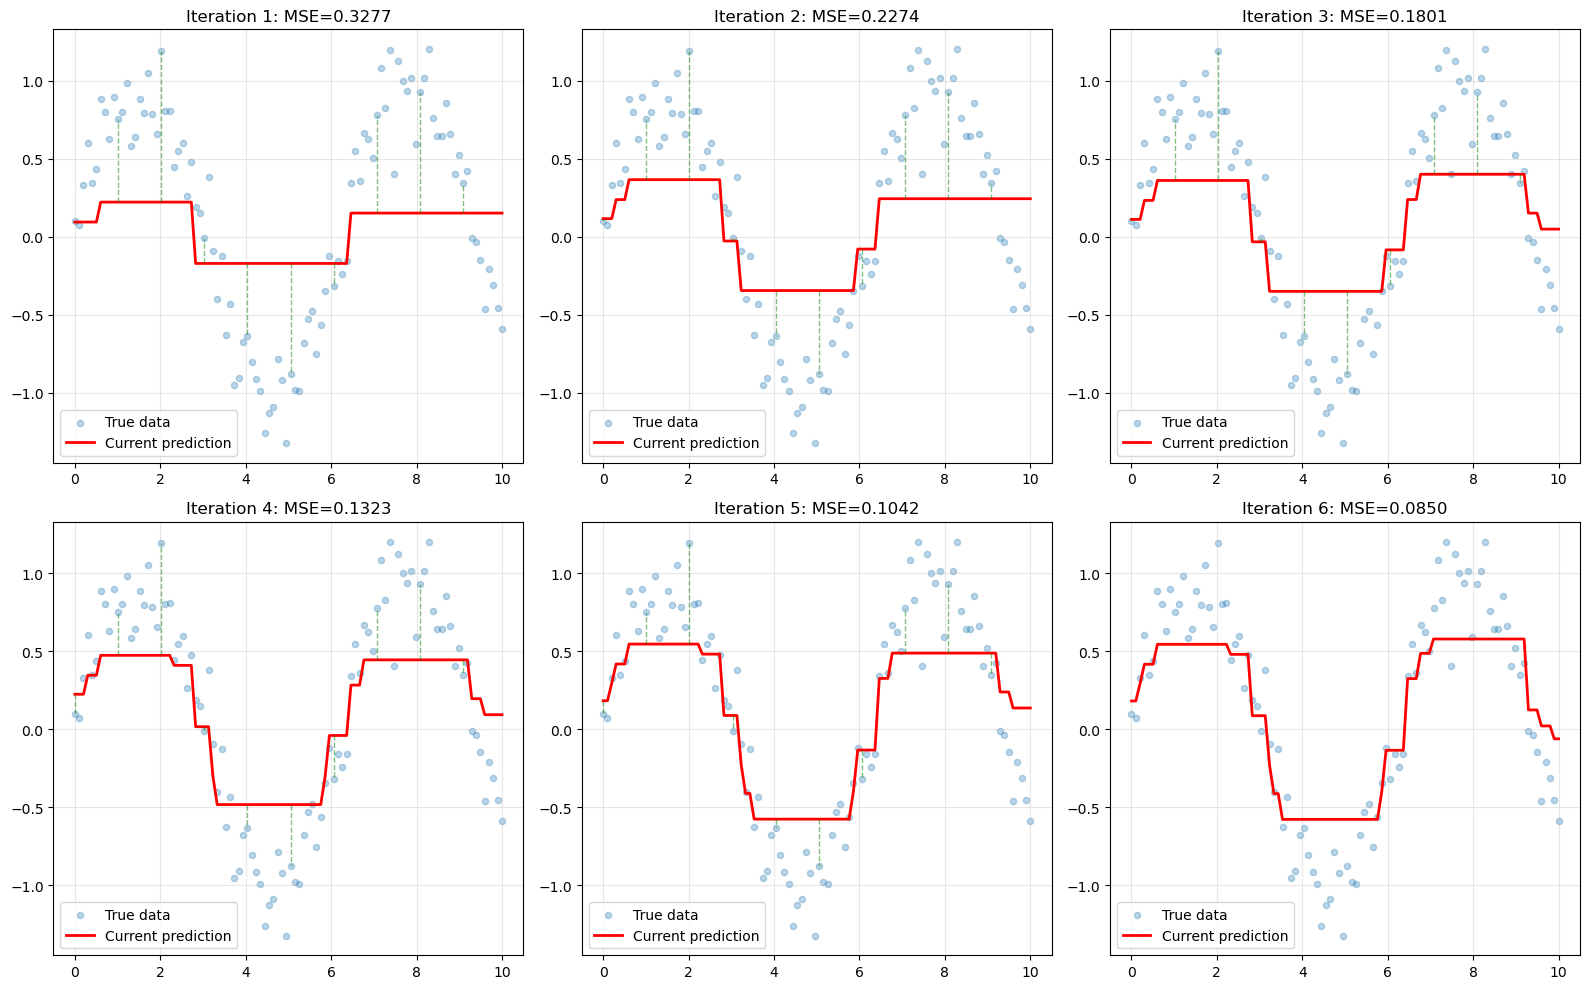

Green dashed lines = Residuals that the next tree will fit
Red line = Current ensemble prediction

Notice how residuals shrink and prediction improves!


In [10]:
# Generate non-linear data
np.random.seed(42)
X_residual = np.linspace(0, 10, 100).reshape(-1, 1)
y_residual = np.sin(X_residual).ravel() + np.random.randn(100) * 0.2

# Simulate gradient boosting manually
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

# Initialize prediction
F = np.zeros(len(y_residual))
learning_rate = 0.3

for i in range(6):
    # Calculate residuals
    residuals = y_residual - F

    # Fit a tree to residuals
    tree = DecisionTreeRegressor(max_depth=2, random_state=i)
    tree.fit(X_residual, residuals)

    # Update predictions
    h = tree.predict(X_residual)
    F += learning_rate * h

    # Plot
    ax = axes[i]
    ax.scatter(X_residual, y_residual, alpha=0.3, label='True data', s=20)
    ax.plot(X_residual, F, 'r-', linewidth=2, label='Current prediction')

    # Show residuals as vertical lines
    if i < 5:
        for j in range(0, len(X_residual), 10):
            ax.plot([X_residual[j], X_residual[j]], [F[j], y_residual[j]],
                   'g--', alpha=0.5, linewidth=1)

    mse = mean_squared_error(y_residual, F)
    ax.set_title(f'Iteration {i + 1}: MSE={mse:.4f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Green dashed lines = Residuals that the next tree will fit")
print("Red line = Current ensemble prediction")
print("\nNotice how residuals shrink and prediction improves!")

---

## Part 5: Gradient Boosting Regression

### Exercise 5.1: Apply to Synthetic Data

**Task:** Use GradientBoostingRegressor on synthetic data and visualize progression.

Gradient Boosting Regression:
Train MSE: 0.0277
Test MSE:  0.1126
Test R²:   0.7931


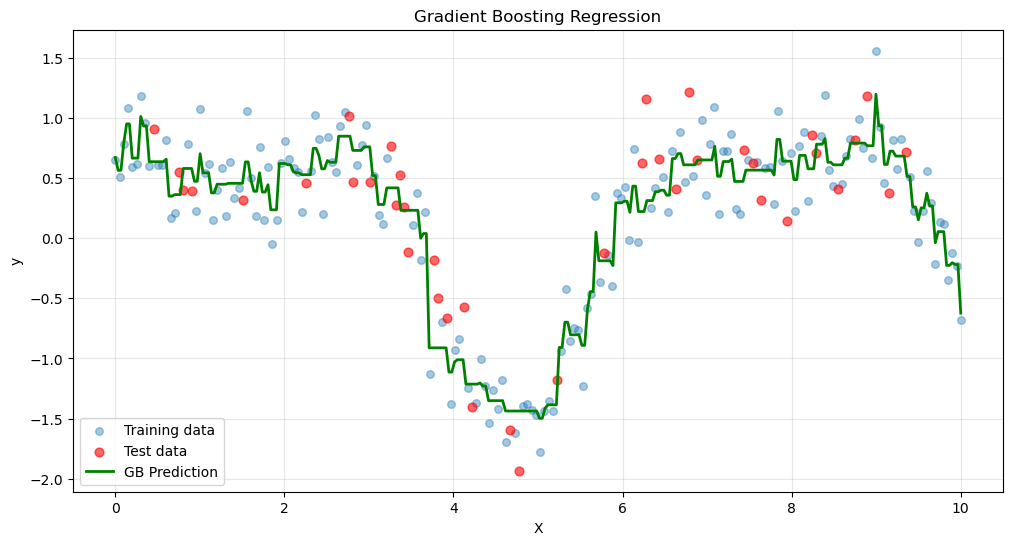

In [11]:
# Generate complex non-linear data
np.random.seed(42)
X_gb_reg = np.linspace(0, 10, 200).reshape(-1, 1)
y_gb_reg = np.sin(X_gb_reg).ravel() + 0.5 * np.cos(2 * X_gb_reg).ravel() + np.random.randn(200) * 0.3

# Split data
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(
    X_gb_reg, y_gb_reg, test_size=0.2, random_state=42
)

# Your turn: Train GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_reg.fit(X_train_gb, y_train_gb)

# Predict
y_train_pred_gb = gb_reg.predict(X_train_gb)
y_test_pred_gb = gb_reg.predict(X_test_gb)

# Evaluate
train_mse = mean_squared_error(y_train_gb, y_train_pred_gb)
test_mse = mean_squared_error(y_test_gb, y_test_pred_gb)
test_r2 = r2_score(y_test_gb, y_test_pred_gb)

print("Gradient Boosting Regression:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE:  {test_mse:.4f}")
print(f"Test R²:   {test_r2:.4f}")

# Plot predictions
plt.figure(figsize=(12, 6))
plt.scatter(X_train_gb, y_train_gb, alpha=0.4, label='Training data', s=30)
plt.scatter(X_test_gb, y_test_gb, alpha=0.6, c='red', label='Test data', s=40)

# Plot smooth prediction curve
X_plot = np.linspace(0, 10, 300).reshape(-1, 1)
y_plot = gb_reg.predict(X_plot)
plt.plot(X_plot, y_plot, 'g-', linewidth=2, label='GB Prediction')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Boosting Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Exercise 5.2: Visualize Staged Predictions

**Task:** Show how predictions evolve as more trees are added.

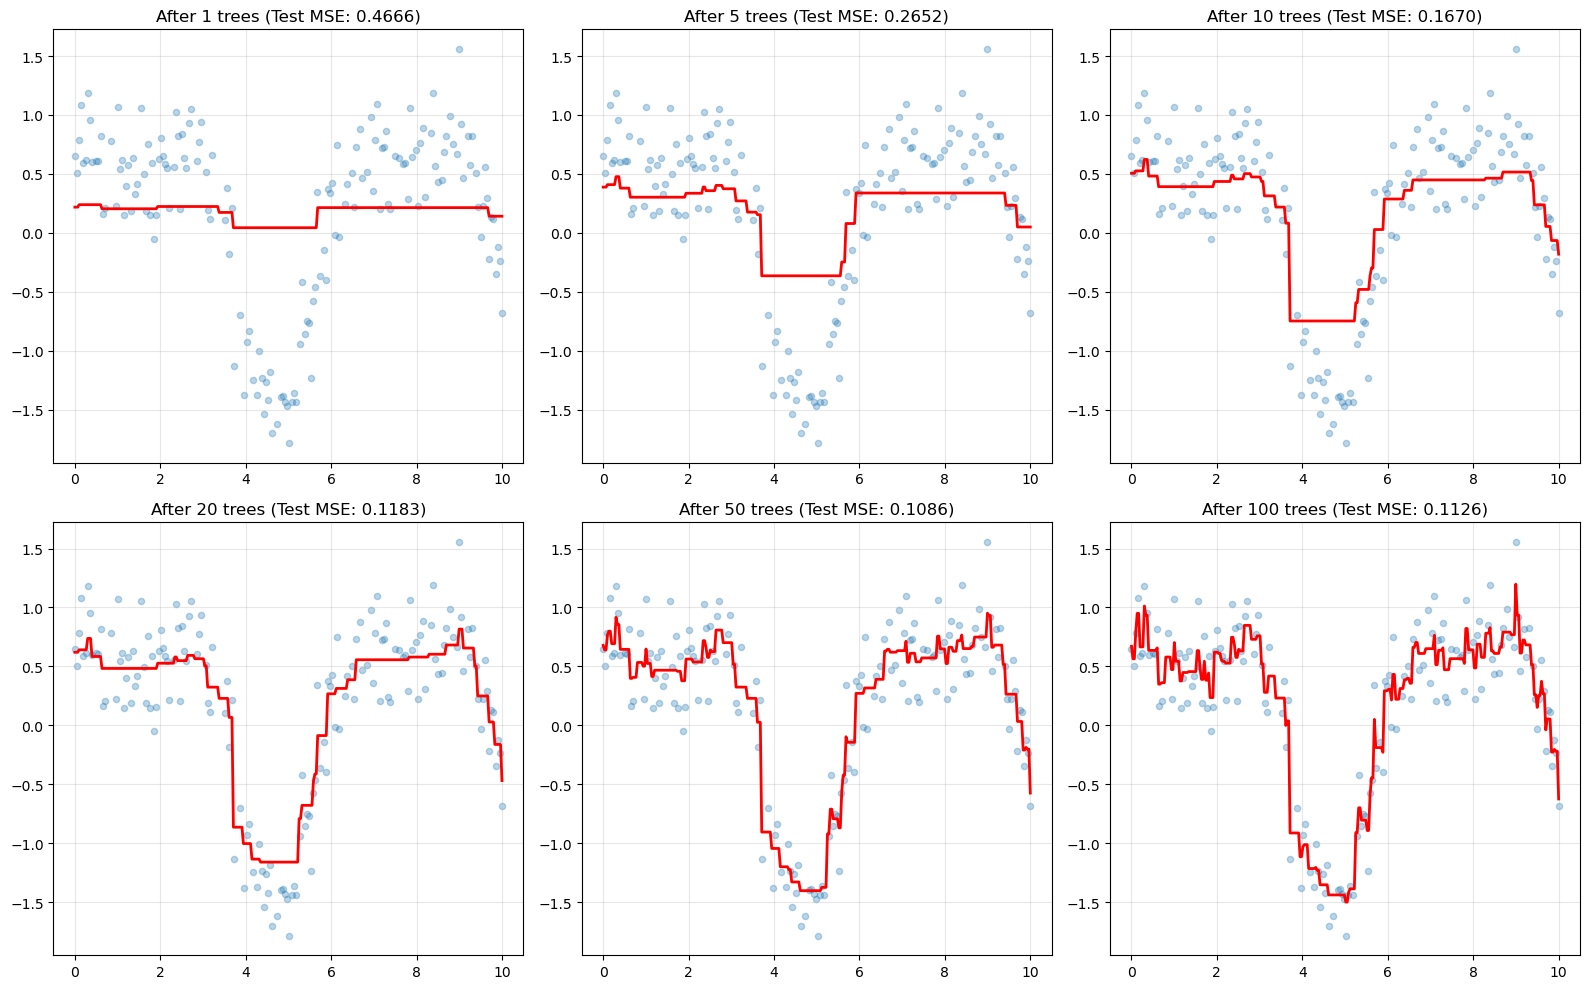

Watch how the model gradually learns the pattern!


In [12]:
# Train new model to track staged predictions
gb_staged = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
)
gb_staged.fit(X_train_gb, y_train_gb)

# Get staged predictions
X_plot = np.linspace(0, 10, 300).reshape(-1, 1)
stages_to_plot = [1, 5, 10, 20, 50, 100]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

# Get all staged predictions
all_predictions = list(gb_staged.staged_predict(X_plot))

for idx, stage in enumerate(stages_to_plot):
    ax = axes[idx]
    ax.scatter(X_train_gb, y_train_gb, alpha=0.3, s=20)

    # Get prediction at this stage
    y_pred_stage = all_predictions[stage - 1]
    ax.plot(X_plot, y_pred_stage, 'r-', linewidth=2)

    # Calculate MSE at this stage
    test_pred_stage = list(gb_staged.staged_predict(X_test_gb))[stage - 1]
    mse_stage = mean_squared_error(y_test_gb, test_pred_stage)

    ax.set_title(f'After {stage} trees (Test MSE: {mse_stage:.4f})')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Watch how the model gradually learns the pattern!")

---

## Part 6: Gradient Boosting Classification

### Exercise 6.1: Apply to Digits Dataset

**Task:** Use gradient boosting for multi-class classification on the digits dataset.

Digits Dataset:
Shape: (1797, 64)
Classes: [0 1 2 3 4 5 6 7 8 9]
Number of samples: 1797

Gradient Boosting on Digits:
Train Accuracy: 1.0000
Test Accuracy:  0.9694

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      0.97      0.98        33
           3       1.00      0.94      0.97        34
           4       1.00      0.96      0.98        46
           5       0.98      0.98      0.98        47
           6       0.97      0.94      0.96        35
           7       0.92      0.97      0.94        34
           8       0.91      1.00      0.95        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



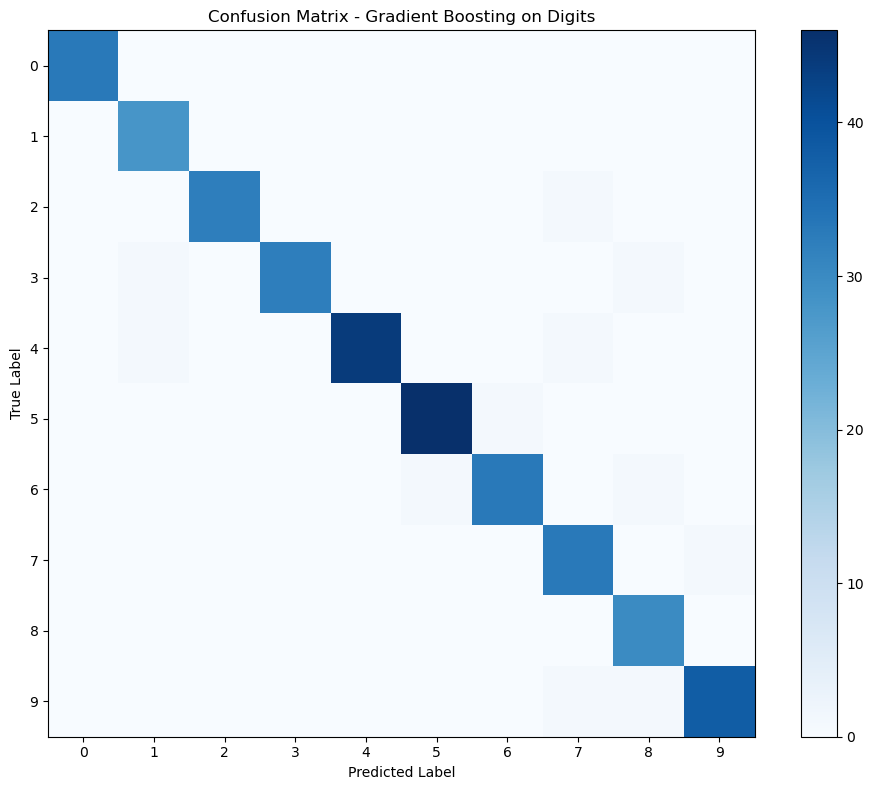

In [13]:
# Load digits dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print("Digits Dataset:")
print(f"Shape: {X_digits.shape}")
print(f"Classes: {np.unique(y_digits)}")
print(f"Number of samples: {len(X_digits)}")

# Split data
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_digits, y_digits, test_size=0.2, random_state=42
)

# Your turn: Train GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_clf.fit(X_train_d, y_train_d)

# Predict
y_pred_d = gb_clf.predict(X_test_d)

# Evaluate
train_acc_d = gb_clf.score(X_train_d, y_train_d)
test_acc_d = gb_clf.score(X_test_d, y_test_d)

print("\nGradient Boosting on Digits:")
print(f"Train Accuracy: {train_acc_d:.4f}")
print(f"Test Accuracy:  {test_acc_d:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_d, y_pred_d))

# Confusion matrix
cm = confusion_matrix(y_test_d, y_pred_d)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting on Digits')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

### Exercise 6.2: Feature Importance Analysis

**Task:** Visualize which pixels are most important for digit classification.

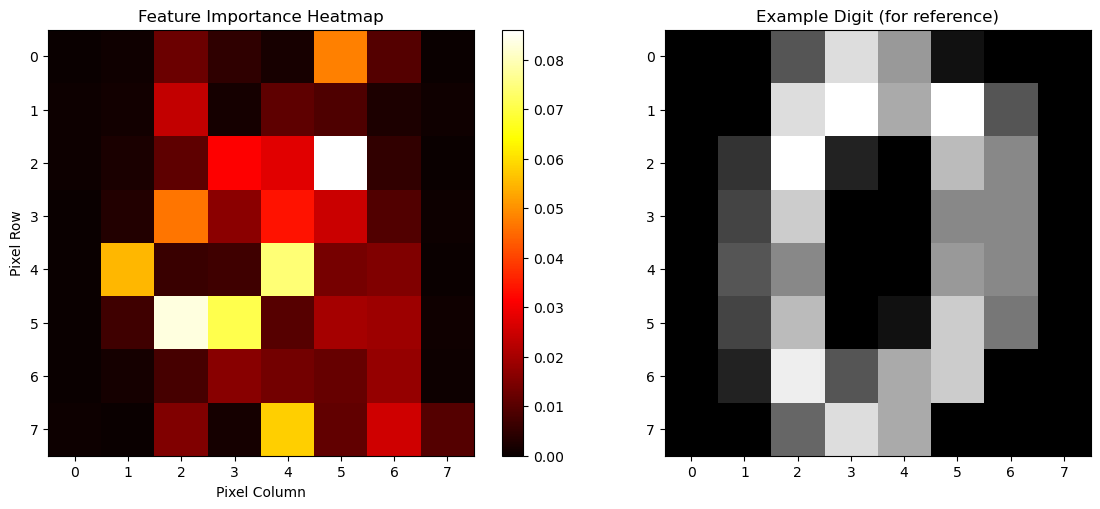


Top 10 Most Important Pixels:
1. Pixel (2, 5): Importance = 0.0860
2. Pixel (5, 2): Importance = 0.0831
3. Pixel (4, 4): Importance = 0.0742
4. Pixel (5, 3): Importance = 0.0707
5. Pixel (7, 4): Importance = 0.0578
6. Pixel (4, 1): Importance = 0.0550
7. Pixel (0, 5): Importance = 0.0480
8. Pixel (3, 2): Importance = 0.0467
9. Pixel (3, 4): Importance = 0.0339
10. Pixel (2, 3): Importance = 0.0315


In [14]:
# Get feature importances
feature_importance = gb_clf.feature_importances_

# Reshape to 8x8 image
importance_image = feature_importance.reshape(8, 8)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Feature importance heatmap
axes[0].imshow(importance_image, cmap='hot', interpolation='nearest')
axes[0].set_title('Feature Importance Heatmap')
axes[0].set_xlabel('Pixel Column')
axes[0].set_ylabel('Pixel Row')
plt.colorbar(axes[0].imshow(importance_image, cmap='hot'), ax=axes[0])

# Example digit for reference
axes[1].imshow(digits.images[0], cmap='gray')
axes[1].set_title('Example Digit (for reference)')

plt.tight_layout()
plt.show()

# Top 10 most important pixels
top_10_pixels = np.argsort(feature_importance)[-10:][::-1]
print("\nTop 10 Most Important Pixels:")
for i, pixel_idx in enumerate(top_10_pixels, 1):
    row = pixel_idx // 8
    col = pixel_idx % 8
    print(f"{i}. Pixel ({row}, {col}): Importance = {feature_importance[pixel_idx]:.4f}")

---

## Part 7: Learning Rate Effects

### Exercise 7.1: Compare Different Learning Rates

**Task:** Analyze how learning rate affects model performance and training speed.

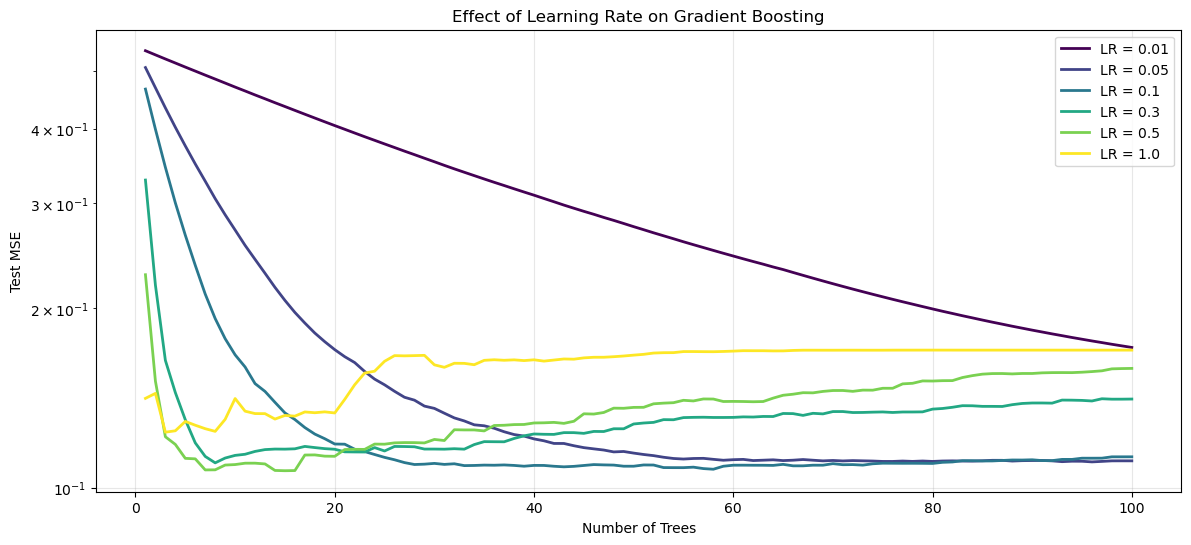

Key Observations:
- Lower learning rate: Slower learning, more trees needed, less overfitting
- Higher learning rate: Faster learning, fewer trees needed, more overfitting risk
- Trade-off: learning_rate × n_estimators


In [15]:
# Test different learning rates
learning_rates = [0.01, 0.05, 0.1, 0.3, 0.5, 1.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(learning_rates)))

plt.figure(figsize=(14, 6))

for lr, color in zip(learning_rates, colors):
    # Train model
    gb_lr = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=lr,
        max_depth=3,
        random_state=42
    )
    gb_lr.fit(X_train_gb, y_train_gb)

    # Calculate test MSE at each stage
    test_scores = []
    for pred in gb_lr.staged_predict(X_test_gb):
        mse = mean_squared_error(y_test_gb, pred)
        test_scores.append(mse)

    # Plot
    plt.plot(range(1, 101), test_scores, label=f'LR = {lr}', color=color, linewidth=2)

plt.xlabel('Number of Trees')
plt.ylabel('Test MSE')
plt.title('Effect of Learning Rate on Gradient Boosting')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

print("Key Observations:")
print("- Lower learning rate: Slower learning, more trees needed, less overfitting")
print("- Higher learning rate: Faster learning, fewer trees needed, more overfitting risk")
print("- Trade-off: learning_rate × n_estimators")

### Exercise 7.2: Optimal Learning Rate Analysis

**Task:** Find the best combination of learning rate and number of estimators.

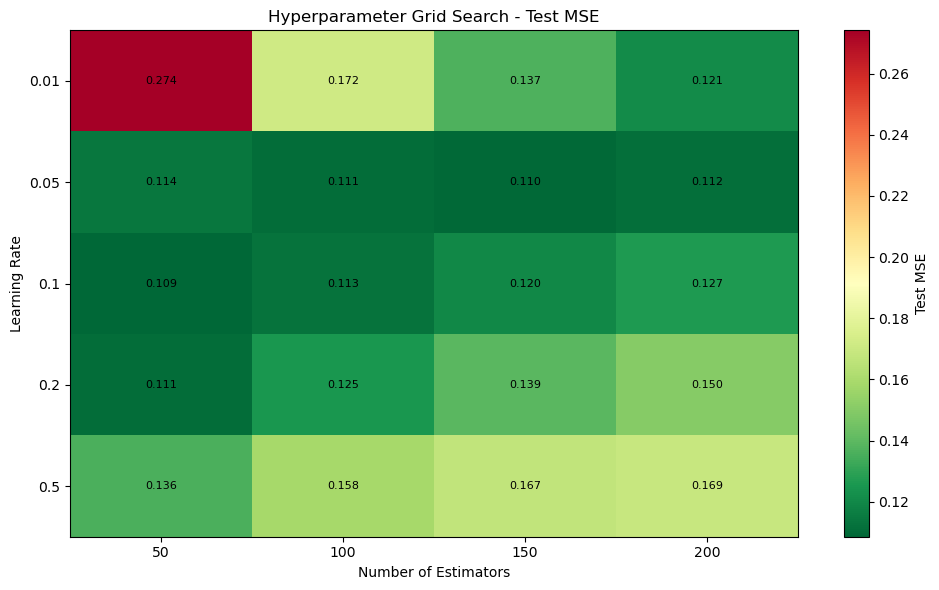


Best Configuration:
Learning Rate: 0.1
N Estimators: 50
Test MSE: 0.1086


In [16]:
# Grid of hyperparameters
learning_rates_grid = [0.01, 0.05, 0.1, 0.2, 0.5]
n_estimators_grid = [50, 100, 150, 200]

results = []

for lr in learning_rates_grid:
    for n_est in n_estimators_grid:
        gb = GradientBoostingRegressor(
            n_estimators=n_est,
            learning_rate=lr,
            max_depth=3,
            random_state=42
        )
        gb.fit(X_train_gb, y_train_gb)
        test_mse = mean_squared_error(y_test_gb, gb.predict(X_test_gb))
        results.append((lr, n_est, test_mse))

# Convert to array for plotting
results = np.array(results)

# Create heatmap
pivot_table = np.zeros((len(learning_rates_grid), len(n_estimators_grid)))
for i, lr in enumerate(learning_rates_grid):
    for j, n_est in enumerate(n_estimators_grid):
        mask = (results[:, 0] == lr) & (results[:, 1] == n_est)
        pivot_table[i, j] = results[mask, 2][0]

plt.figure(figsize=(10, 6))
plt.imshow(pivot_table, cmap='RdYlGn_r', aspect='auto')
plt.colorbar(label='Test MSE')
plt.xticks(range(len(n_estimators_grid)), n_estimators_grid)
plt.yticks(range(len(learning_rates_grid)), learning_rates_grid)
plt.xlabel('Number of Estimators')
plt.ylabel('Learning Rate')
plt.title('Hyperparameter Grid Search - Test MSE')

# Annotate cells with values
for i in range(len(learning_rates_grid)):
    for j in range(len(n_estimators_grid)):
        plt.text(j, i, f'{pivot_table[i, j]:.3f}',
                ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

# Best configuration
best_idx = np.argmin(results[:, 2])
best_lr, best_n_est, best_mse = results[best_idx]
print(f"\nBest Configuration:")
print(f"Learning Rate: {best_lr}")
print(f"N Estimators: {int(best_n_est)}")
print(f"Test MSE: {best_mse:.4f}")

---

## Part 8: Boosting vs Bagging Comparison

### Exercise 8.1: Side-by-Side Comparison

**Task:** Compare AdaBoost, Gradient Boosting, and Random Forest on the same dataset.


Model Comparison:
Model                Train Acc    Test Acc     CV Mean±Std
AdaBoost             0.9643       0.8500       0.7871±0.0413
Gradient Boosting    0.9971       0.8867       0.8757±0.0167
Random Forest        1.0000       0.8867       0.9057±0.0165
Single Tree          1.0000       0.7967       0.7643±0.0186


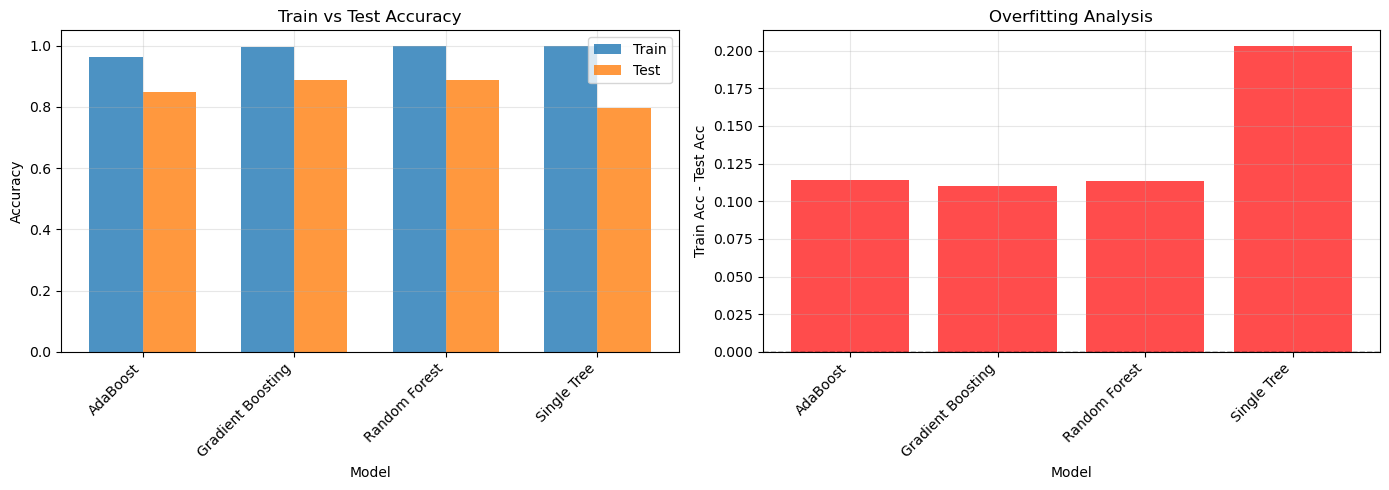


Key Insights:
- Boosting often achieves higher accuracy than bagging
- Boosting may overfit more on training data
- Random Forest provides good balance and stability


In [17]:
# Generate comparison dataset
X_comp, y_comp = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
    random_state=42
)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_comp, y_comp, test_size=0.3, random_state=42
)

# Train multiple models
models = {
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Single Tree': DecisionTreeClassifier(random_state=42)
}

results_comp = {}

for name, model in models.items():
    # Train
    model.fit(X_train_c, y_train_c)

    # Evaluate
    train_acc = model.score(X_train_c, y_train_c)
    test_acc = model.score(X_test_c, y_test_c)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_c, y_train_c, cv=5)

    results_comp[name] = {
        'train_acc': train_acc,
        'test_acc': test_acc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

# Display results
print("\nModel Comparison:")
print("=" * 70)
print(f"{'Model':<20} {'Train Acc':<12} {'Test Acc':<12} {'CV Mean±Std'}")
print("=" * 70)
for name, scores in results_comp.items():
    print(f"{name:<20} {scores['train_acc']:<12.4f} {scores['test_acc']:<12.4f} "
          f"{scores['cv_mean']:.4f}±{scores['cv_std']:.4f}")
print("=" * 70)

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
model_names = list(results_comp.keys())
train_accs = [results_comp[m]['train_acc'] for m in model_names]
test_accs = [results_comp[m]['test_acc'] for m in model_names]

x = np.arange(len(model_names))
width = 0.35

axes[0].bar(x - width/2, train_accs, width, label='Train', alpha=0.8)
axes[0].bar(x + width/2, test_accs, width, label='Test', alpha=0.8)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Train vs Test Accuracy')
axes[0].set_xticks(x)
axes[0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Overfitting analysis
overfit = np.array(train_accs) - np.array(test_accs)
colors = ['red' if o > 0.05 else 'green' for o in overfit]

axes[1].bar(model_names, overfit, color=colors, alpha=0.7)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Train Acc - Test Acc')
axes[1].set_title('Overfitting Analysis')
axes[1].set_xticklabels(model_names, rotation=45, ha='right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("- Boosting often achieves higher accuracy than bagging")
print("- Boosting may overfit more on training data")
print("- Random Forest provides good balance and stability")

---

## Part 9: Real-World Regression

### Exercise 9.1: Diabetes Dataset Prediction

**Task:** Apply gradient boosting to predict disease progression in diabetes patients.

### Exercise 9.2: Prediction Analysis

**Task:** Visualize predictions vs actual values and residuals.

---

## Part 10: Imbalanced Classification

### Exercise 10.1: Create Imbalanced Dataset

**Task:** Apply boosting to handle imbalanced classification problems.

In [18]:
# Create imbalanced dataset (90% class 0, 10% class 1)
X_imb, y_imb = make_classification(
    n_samples=1000, n_features=20, n_informative=15,
    n_redundant=5, weights=[0.9, 0.1], flip_y=0.01, random_state=42
)

print("Imbalanced Dataset:")
print(f"Total samples: {len(y_imb)}")
print(f"Class 0: {np.sum(y_imb == 0)} ({100 * np.sum(y_imb == 0) / len(y_imb):.1f}%)")
print(f"Class 1: {np.sum(y_imb == 1)} ({100 * np.sum(y_imb == 1) / len(y_imb):.1f}%)")

# Split data
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb, y_imb, test_size=0.3, random_state=42, stratify=y_imb
)

# Train models
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve

models_imb = {
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results_imb = {}

for name, model in models_imb.items():
    model.fit(X_train_imb, y_train_imb)

    y_pred = model.predict(X_test_imb)
    y_pred_proba = model.predict_proba(X_test_imb)[:, 1]

    from sklearn.metrics import precision_score, recall_score, f1_score

    results_imb[name] = {
        'accuracy': accuracy_score(y_test_imb, y_pred),
        'precision': precision_score(y_test_imb, y_pred),
        'recall': recall_score(y_test_imb, y_pred),
        'f1': f1_score(y_test_imb, y_pred),
        'roc_auc': roc_auc_score(y_test_imb, y_pred_proba),
        'y_pred_proba': y_pred_proba
    }

# Display results
print("\nImbalanced Classification Results:")
print("=" * 80)
print(f"{'Model':<20} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1':<12} {'ROC-AUC'}")
print("=" * 80)
for name, scores in results_imb.items():
    print(f"{name:<20} {scores['accuracy']:<12.4f} {scores['precision']:<12.4f} "
          f"{scores['recall']:<12.4f} {scores['f1']:<12.4f} {scores['roc_auc']:.4f}")
print("=" * 80)

print("\nNote: For imbalanced data, focus on Precision, Recall, F1, and ROC-AUC rather than Accuracy!")

Imbalanced Dataset:
Total samples: 1000
Class 0: 898 (89.8%)
Class 1: 102 (10.2%)

Imbalanced Classification Results:
Model                Accuracy     Precision    Recall       F1           ROC-AUC
AdaBoost             0.9000       0.5294       0.2903       0.3750       0.8165
Gradient Boosting    0.9100       0.7000       0.2258       0.3415       0.8822
Random Forest        0.9067       0.8000       0.1290       0.2222       0.8720

Note: For imbalanced data, focus on Precision, Recall, F1, and ROC-AUC rather than Accuracy!


### Exercise 10.2: ROC and Precision-Recall Curves

**Task:** Visualize model performance on imbalanced data.

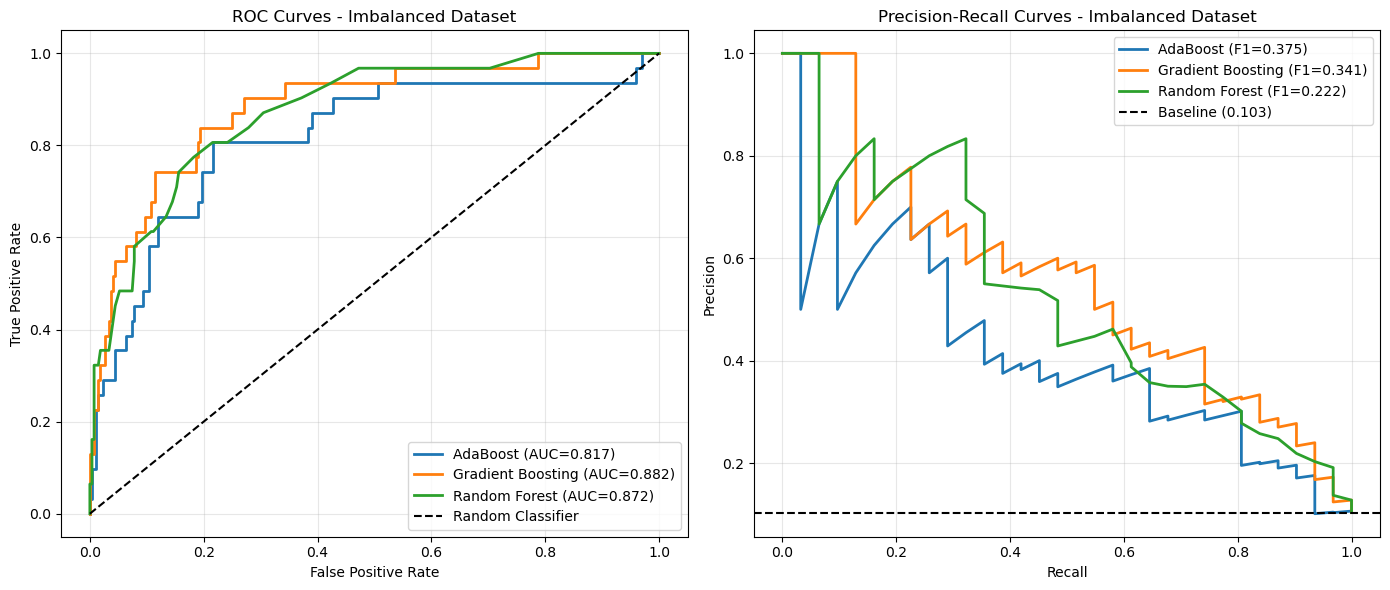

For imbalanced data:
- ROC curve shows overall discriminative ability
- Precision-Recall curve is more informative for minority class performance


In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ROC Curves
for name, scores in results_imb.items():
    fpr, tpr, _ = roc_curve(y_test_imb, scores['y_pred_proba'])
    axes[0].plot(fpr, tpr, label=f"{name} (AUC={scores['roc_auc']:.3f})", linewidth=2)

axes[0].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curves - Imbalanced Dataset')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Precision-Recall Curves
for name, scores in results_imb.items():
    precision, recall, _ = precision_recall_curve(y_test_imb, scores['y_pred_proba'])
    axes[1].plot(recall, precision, label=f"{name} (F1={scores['f1']:.3f})", linewidth=2)

# Baseline (proportion of positive class)
baseline = np.sum(y_test_imb == 1) / len(y_test_imb)
axes[1].axhline(y=baseline, color='k', linestyle='--', label=f'Baseline ({baseline:.3f})')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curves - Imbalanced Dataset')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("For imbalanced data:")
print("- ROC curve shows overall discriminative ability")
print("- Precision-Recall curve is more informative for minority class performance")

---

## Challenge Problems (Optional)

### Challenge 1: Early Stopping

Implement early stopping to prevent overfitting in gradient boosting.

In [20]:
# Your turn: Implement early stopping
# Hint: Use validation_fraction and n_iter_no_change parameters

# Create validation set
X_train_es, X_val_es, y_train_es, y_val_es = train_test_split(
    X_train_gb, y_train_gb, test_size=0.2, random_state=42
)

# Your code here
gb_reg = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_reg.fit(X_train_gb, y_train_gb)
print("Challenge: Train a model with early stopping and report the number of iterations used.")

Challenge: Train a model with early stopping and report the number of iterations used.


### Challenge 2: Custom Loss Function

Explore gradient boosting with different loss functions.

In [21]:
# Compare different loss functions for regression
loss_functions = ['squared_error', 'absolute_error', 'huber']

# Your code here
gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_clf.fit(X_train_d, y_train_d)
print("Challenge: Compare different loss functions and analyze robustness to outliers.")

Challenge: Compare different loss functions and analyze robustness to outliers.


### Challenge 3: XGBoost Integration

If available, try using XGBoost for even better performance.

In [22]:
# Uncomment if you have xgboost installed
# import xgboost as xgb

# xgb_model = xgb.XGBClassifier(
#     n_estimators=100,
#     learning_rate=0.1,
#     max_depth=3,
#     random_state=42
# )

# Your code here
print("Challenge: Install xgboost and compare with sklearn's gradient boosting.")

Challenge: Install xgboost and compare with sklearn's gradient boosting.


---

## Reflection Questions

1. **What is the key difference between AdaBoost and Gradient Boosting?**
   - AdaBoost: Reweights samples
   - Gradient Boosting: Fits residuals

2. **Why is learning rate important in boosting?**
   - Controls contribution of each tree
   - Trade-off between speed and overfitting
   - Lower rate needs more trees but generalizes better

3. **When should you use boosting vs bagging?**
   - Boosting: When you need maximum accuracy and can afford computation
   - Bagging: When you want stability and parallelization
   - Boosting: More prone to overfitting
   - Bagging: More robust to noise

4. **How does boosting handle imbalanced data?**
   - Naturally focuses on hard examples (including minority class)
   - Can use class weights for additional emphasis
   - Better than simple approaches like random oversampling

5. **What are the main hyperparameters to tune in gradient boosting?**
   - `n_estimators`: Number of trees
   - `learning_rate`: Shrinkage parameter
   - `max_depth`: Tree complexity
   - `min_samples_split`: Minimum samples to split
   - `subsample`: Stochastic gradient boosting

6. **Why might gradient boosting overfit?**
   - Sequential nature makes it sensitive to noise
   - Later trees may fit idiosyncrasies of training data
   - Solution: Lower learning rate, early stopping, regularization

---

## Summary

In this exercise, you learned:

✓ Core concepts of boosting and sample reweighting  
✓ AdaBoost algorithm and implementation from scratch  
✓ Gradient boosting through residual fitting  
✓ Applying boosting to classification and regression  
✓ Effect of learning rate on model performance  
✓ Comparing boosting with bagging approaches  
✓ Handling imbalanced classification problems  
✓ Feature importance analysis with boosting  
✓ Real-world applications and evaluation  

**Next Steps:**

- Explore XGBoost and LightGBM libraries
- Learn about histogram-based gradient boosting
- Study advanced regularization techniques
- Apply boosting to your own datasets

---

**Need help?** Check the solution notebook or open an issue on [GitHub](https://github.com/jumpingsphinx/jumpingsphinx.github.io/issues).